# OU Fitter with Jumps

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ito_diffusions import *
from ou_fitter import *
from scipy.stats import laplace
plt.style.use('dark_background')

In [3]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [4]:
DAYS_IN_YEAR = 252
T = 8
SCHEME_STEPS = int(DAYS_IN_YEAR*T)
std_dev_weight = 1.0
n_quadrature = 15

### OU with jumps

$dX_t = \lambda(\theta_{0} - X_t)dt + \sigma{dW_t} + dJ_t$ where the jump process $J_t$ has constant Poisson intensity $m$ and jump size distribution $Laplace(\beta)$

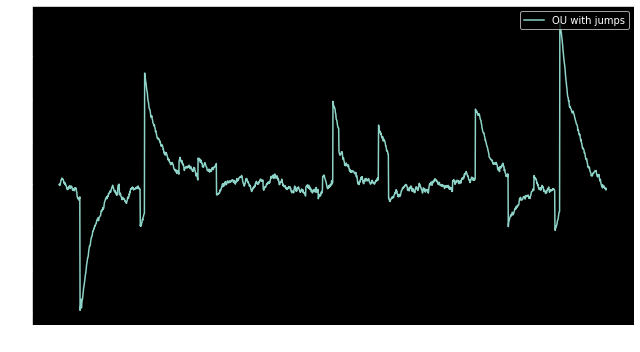

In [5]:
fig, ax = plt.subplots(figsize=(9,5), nrows=1, ncols=1)
mean_reversion = 5.0
long_term  = 0.0
vol = 0.4

jump_intensity = 2.0
jump_size_scale = 1.0
jump_size_distr = laplace(loc=0.0, scale=1/jump_size_scale)
jump_params = {
    'jump_intensity_func': lambda t,x: jump_intensity,
    'jump_size_distr': jump_size_distr,
}

OU = Vasicek(x0=0.0, T=T, scheme_steps=SCHEME_STEPS,
             vol=vol, long_term=long_term, mean_reversion=mean_reversion, jump_params=jump_params)

df = OU.simulate()
ax.plot(df, label='OU with jumps')
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Resources

* https://github.com/sauxpa/stochastic/blob/master/examples/ou_fitting_examples/ou_fit_artificial_data.ipynb